# **Regressão - Delta t7**
Diferença de dias entre última informação e consulta

## **Dados**

In [ ]:
df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')
df_fora = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

(806402, 94)
(62317, 94)


**SP**

In [ ]:
df_SP.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    717377
delta_t6      717377
delta_t5      717377
delta_t4      717377
IDADE              1
TRATAMENTO         0
dtype: int64

**Fora de SP**

In [ ]:
df_fora.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    57799
delta_t6      57799
delta_t5      57799
delta_t4      57799
NAOTRAT           0
LOCALTNM          0
dtype: int64

## **Divisão em treino e teste**

In [ ]:
list_drop = ['UFRESID', 'DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTRECIDIVA', 'DTULTINFO',
              'IDADE', 'PERDASEG', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'delta_t4',
              'delta_t5', 'delta_t6', 'delta_t8', 'delta_t9', 'ob', 'ano_ob',
              'ob_com_rec', 'ob_sem_rec', 'vivo_com_rec', 'vivo_sem_rec', 'ULTINFO']

lb = 'delta_t7'

**SP**

In [ ]:
X_trainSP, X_testSP, y_trainSP, y_testSP = get_train_test(df_SP, list_drop, lb)

X_train = (604801, 70), X_test = (201601, 70)
y_train = (604801,), y_test = (201601,)


**Fora de SP**

In [ ]:
X_trainFora, X_testFora, y_trainFora, y_testFora = get_train_test(df_fora, list_drop, lb)

X_train = (46737, 70), X_test = (15580, 70)
y_train = (46737,), y_test = (15580,)


## **Encoder e normalização**

**SP**

In [ ]:
X_trainSP_enc, enc_SP, norm_SP = train_preprocessing(X_trainSP, normalizer='StandardScaler')

**Fora de SP**

In [ ]:
X_trainFora_enc, enc_fora, norm_fora = train_preprocessing(X_trainFora, normalizer='StandardScaler')

## **Treinamento dos modelos de Machine Learning**

In [ ]:
X_testSP_ = test_preprocessing(X_testSP, enc_SP, norm_SP)
X_testFora_ = test_preprocessing(X_testFora, enc_fora, norm_fora)

### **Regressão Linear**


In [ ]:
# SP
lr_sp = LinearRegression()
lr_sp.fit(X_trainSP_enc, y_trainSP)

df = validate_regression(X_testSP_, lr_sp, y_testSP)
df.head()

Mean Absolute Error: 917.533
Mean Squared Error: 1440077.136
Root Mean Squared Error: 1200.032
Score: 0.297


,Atual,Predito
400744,1601,1213.106632
369215,821,270.016300
387264,607,1797.295841
296234,450,-45.373349
712621,950,1596.070987


In [ ]:
# Fora
lr_fora = LinearRegression()
lr_fora.fit(X_trainFora_enc, y_trainFora)

df = validate_regression(X_testFora_, lr_fora, y_testFora)
df.head()

Mean Absolute Error: 812.895
Mean Squared Error: 1189460.535
Root Mean Squared Error: 1090.624
Score: 0.320


,Atual,Predito
1077,725,762.625683
15361,937,2304.641308
3301,0,488.617871
32432,3338,1914.063183
39694,649,1625.637402


### **Random Forest Regressor**

In [ ]:
# SP
rfr_sp = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_sp.fit(X_trainSP_enc, y_trainSP)

df = validate_regression(X_testSP_, rfr_sp, y_testSP)
df.head()

Mean Absolute Error: 789.127
Mean Squared Error: 1206939.819
Root Mean Squared Error: 1098.608
Score: 0.411


,Atual,Predito
400744,1601,1066.142604
369215,821,411.362865
387264,607,1413.823723
296234,450,506.042638
712621,950,1197.793248


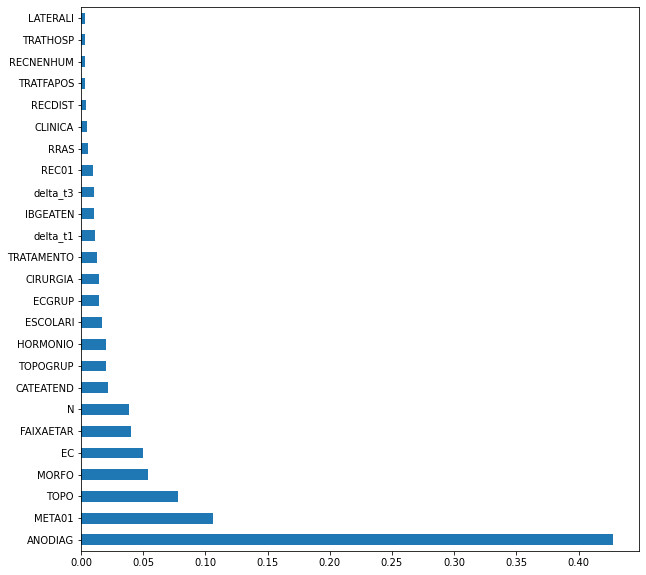

In [ ]:
plot_feat_importances(rfr_sp, X_testSP)

In [ ]:
explainer = shap.TreeExplainer(clf)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
#Fora
rfr_fora = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_fora.fit(X_trainFora_enc, y_trainFora)

df = validate_regression(X_testFora_, rfr_fora, y_testFora)
df.head()

Mean Absolute Error: 666.757
Mean Squared Error: 936572.966
Root Mean Squared Error: 967.767
Score: 0.465


,Atual,Predito
1077,725,603.877560
15361,937,1179.243432
3301,0,142.773351
32432,3338,2193.524780
39694,649,1604.267427


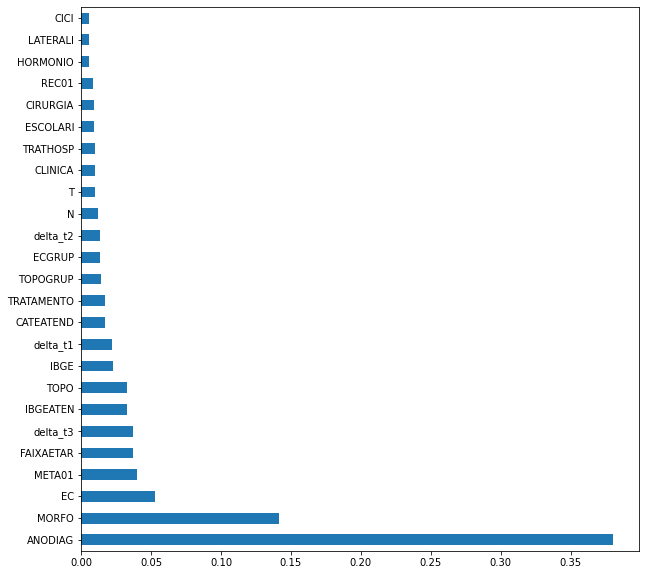

In [ ]:
plot_feat_importances(rfr_fora, X_testFora)

### **XGBoost Regressor**

In [ ]:
# SP
xgbr_sp = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_sp.fit(X_trainSP_enc, y_trainSP)

df = validate_regression(X_testSP_, xgbr_sp, y_testSP)
df.head()

Mean Absolute Error: 688.776
Mean Squared Error: 987516.733
Root Mean Squared Error: 993.739
Score: 0.518


,Atual,Predito
400744,1601,1111.362915
369215,821,553.654419
387264,607,2191.481445
296234,450,291.403107
712621,950,1567.593628


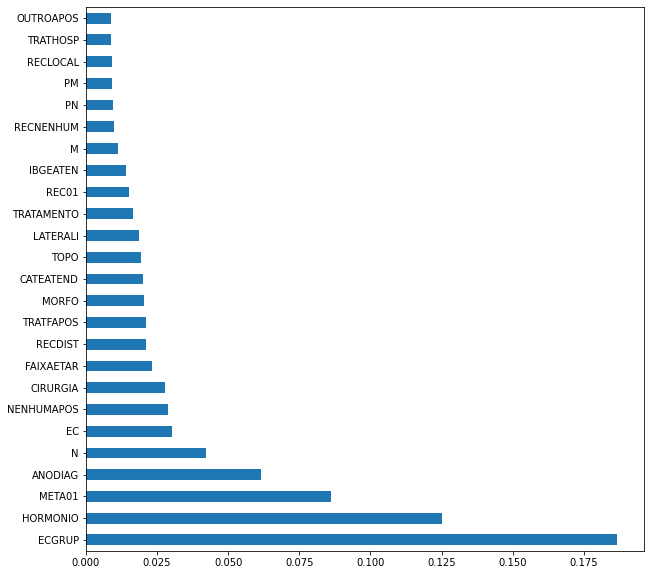

In [ ]:
plot_feat_importances(xgbr_sp, X_testSP)

In [ ]:
# Fora de SP
xgbr_fora = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_fora.fit(X_trainFora_enc, y_trainFora)

df = validate_regression(X_testFora_, xgbr_fora, y_testFora)
df.head()

Mean Absolute Error: 623.954
Mean Squared Error: 873684.741
Root Mean Squared Error: 934.711
Score: 0.500


,Atual,Predito
1077,725,524.960632
15361,937,938.364014
3301,0,128.937836
32432,3338,2433.032715
39694,649,1514.557251


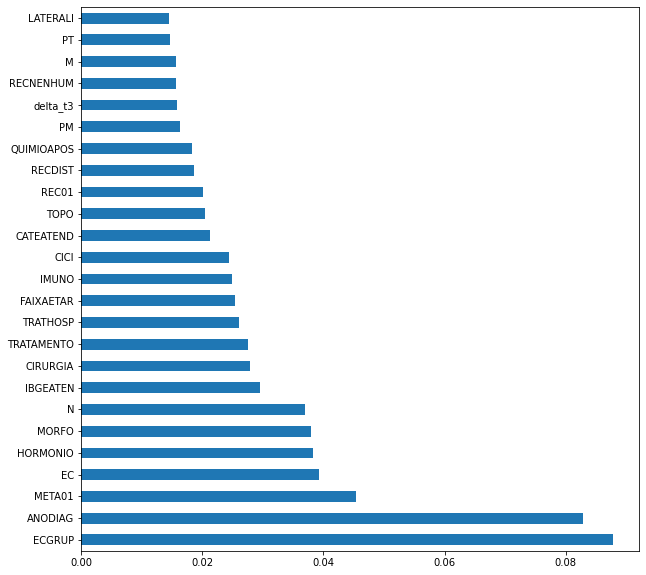

In [ ]:
plot_feat_importances(xgbr_fora, X_testFora)

# **Regressão - Delta t8**
Diferença de dias entre última informação e diagnóstico

## **Dados**

In [ ]:
df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')
df_fora = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

(806402, 94)
(62317, 94)


**SP**

In [ ]:
df_SP.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    717377
delta_t6      717377
delta_t5      717377
delta_t4      717377
IDADE              1
TRATAMENTO         0
dtype: int64

**Fora de SP**

In [ ]:
df_fora.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    57799
delta_t6      57799
delta_t5      57799
delta_t4      57799
NAOTRAT           0
LOCALTNM          0
dtype: int64

## **Divisão em treino e teste**

In [ ]:
list_drop = ['UFRESID', 'DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTRECIDIVA', 'DTULTINFO',
              'IDADE', 'PERDASEG', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'delta_t4',
              'delta_t5', 'delta_t6', 'delta_t7', 'delta_t9', 'ob', 'ano_ob', 
              'ob_com_rec', 'ob_sem_rec', 'vivo_com_rec', 'vivo_sem_rec', 'ULTINFO']
 
lb = 'delta_t8'

**SP**

In [ ]:
X_trainSP, X_testSP, y_trainSP, y_testSP = get_train_test(df_SP, list_drop, lb)

X_train = (604801, 70), X_test = (201601, 70)
y_train = (604801,), y_test = (201601,)


**Fora de SP**

In [ ]:
X_trainFora, X_testFora, y_trainFora, y_testFora = get_train_test(df_fora, list_drop, lb)

X_train = (46737, 70), X_test = (15580, 70)
y_train = (46737,), y_test = (15580,)


## **Encoder e normalização**

**SP**

In [ ]:
X_trainSP_enc, enc_SP, norm_SP = train_preprocessing(X_trainSP, normalizer='StandardScaler')

**Fora de SP**

In [ ]:
X_trainFora_enc, enc_fora, norm_fora = train_preprocessing(X_trainFora, normalizer='StandardScaler')

## **Treinamento dos modelos de Machine Learning**

In [ ]:
X_testSP_ = test_preprocessing(X_testSP, enc_SP, norm_SP)
X_testFora_ = test_preprocessing(X_testFora, enc_fora, norm_fora)

### **Regressão Linear**


In [ ]:
# SP
lr_sp = LinearRegression()
lr_sp.fit(X_trainSP_enc, y_trainSP)

df = validate_regression(X_testSP_, lr_sp, y_testSP)
df.head()

Mean Absolute Error: 917.532
Mean Squared Error: 1440077.362
Root Mean Squared Error: 1200.032
Score: 0.295


,Atual,Predito
400744,1601,1212.895704
369215,821,270.240186
387264,607,1797.195753
296234,433,-62.433153
712621,932,1578.041456


In [ ]:
#Fora
lr_fora = LinearRegression()
lr_fora.fit(X_trainFora_enc, y_trainFora)

df = validate_regression(X_testFora_, lr_fora, y_testFora)
df.head()

Mean Absolute Error: 812.902
Mean Squared Error: 1189432.817
Root Mean Squared Error: 1090.611
Score: 0.317


,Atual,Predito
1077,724,761.469313
15361,936,2302.813063
3301,0,488.399001
32432,3365,1941.109938
39694,663,1639.820876


### **Random Forest Regressor**

In [ ]:
# SP
rfr_sp = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_sp.fit(X_trainSP_enc, y_trainSP)

df = validate_regression(X_testSP_, rfr_sp, y_testSP)
df.head()

Mean Absolute Error: 782.262
Mean Squared Error: 1194981.537
Root Mean Squared Error: 1093.152
Score: 0.415


,Atual,Predito
400744,1601,1087.039035
369215,821,518.036018
387264,607,1372.657580
296234,433,465.771390
712621,932,1188.574914


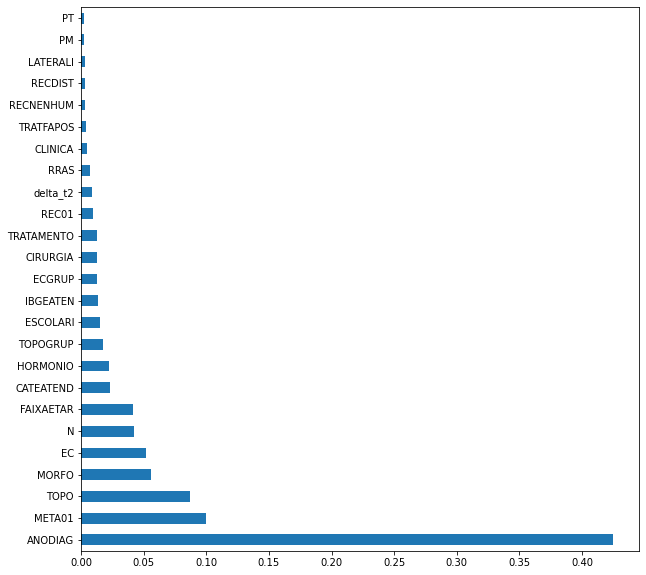

In [ ]:
plot_feat_importances(rfr_sp, X_testSP)

In [ ]:
#Fora
rfr_fora = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_fora.fit(X_trainFora_enc, y_trainFora)

df = validate_regression(X_testFora_, rfr_fora, y_testFora)
df.head()

Mean Absolute Error: 663.865
Mean Squared Error: 932155.284
Root Mean Squared Error: 965.482
Score: 0.465


,Atual,Predito
1077,724,563.031369
15361,936,1175.947709
3301,0,182.594751
32432,3365,2200.058714
39694,663,1630.858141


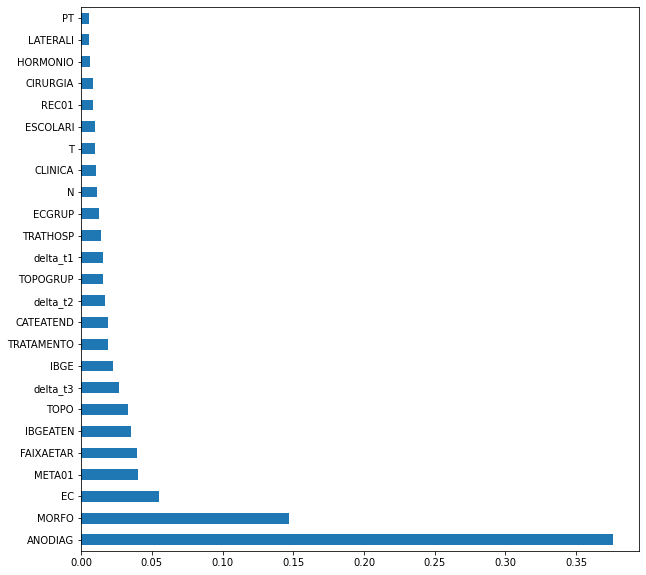

In [ ]:
plot_feat_importances(rfr_fora, X_testFora)

### **XGBoost Regressor**

In [ ]:
# SP
xgbr_sp = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_sp.fit(X_trainSP_enc, y_trainSP)

df = validate_regression(X_testSP_, xgbr_sp, y_testSP)
df.head()

Mean Absolute Error: 684.538
Mean Squared Error: 981686.231
Root Mean Squared Error: 990.801
Score: 0.519


,Atual,Predito
400744,1601,1151.933350
369215,821,588.347168
387264,607,1939.386353
296234,433,386.729523
712621,932,1362.151489


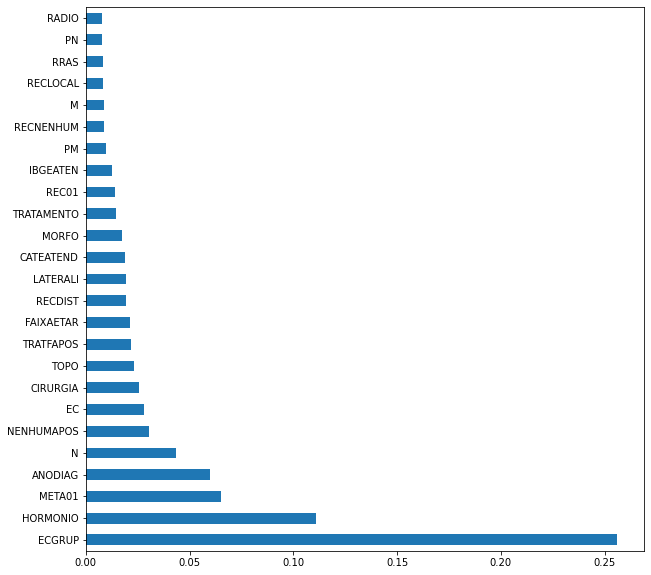

In [ ]:
plot_feat_importances(xgbr_sp, X_testSP)

In [ ]:
# Fora de SP
xgbr_fora = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_fora.fit(X_trainFora_enc, y_trainFora)

df = validate_regression(X_testFora_, xgbr_fora, y_testFora)
df.head()

Mean Absolute Error: 621.821
Mean Squared Error: 871262.892
Root Mean Squared Error: 933.415
Score: 0.500


,Atual,Predito
1077,724,328.065918
15361,936,659.311401
3301,0,85.232018
32432,3365,2337.692383
39694,663,1598.594604


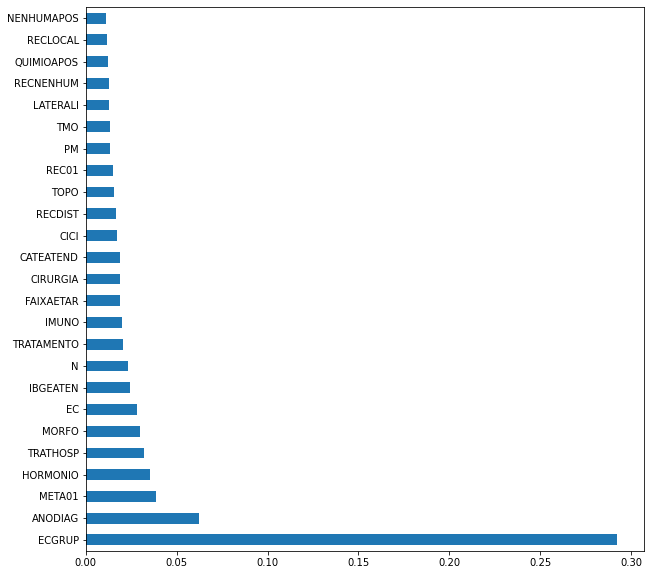

In [ ]:
plot_feat_importances(xgbr_fora, X_testFora)

# **Regressão - Delta t9**
Diferença de dias entre última informação e tratamento

## **Dados**

In [ ]:
df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')
df_fora = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

(806402, 94)
(62317, 94)


**SP**

In [ ]:
df_SP.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    717377
delta_t6      717377
delta_t5      717377
delta_t4      717377
IDADE              1
TRATAMENTO         0
dtype: int64

**Fora de SP**

In [ ]:
df_fora.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    57799
delta_t6      57799
delta_t5      57799
delta_t4      57799
NAOTRAT           0
LOCALTNM          0
dtype: int64

## **Divisão em treino e teste**

In [ ]:
list_drop = ['UFRESID', 'DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTRECIDIVA', 'DTULTINFO',
              'IDADE', 'PERDASEG', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'delta_t4',
              'delta_t5', 'delta_t6', 'delta_t7', 'delta_t8', 'ob', 'ano_ob', 
              'ob_com_rec', 'ob_sem_rec', 'vivo_com_rec', 'vivo_sem_rec', 'ULTINFO']
 
lb = 'delta_t9'

**SP**

In [ ]:
X_trainSP, X_testSP, y_trainSP, y_testSP = get_train_test(df_SP, list_drop, lb)

X_train = (604801, 70), X_test = (201601, 70)
y_train = (604801,), y_test = (201601,)


**Fora de SP**

In [ ]:
X_trainFora, X_testFora, y_trainFora, y_testFora = get_train_test(df_fora, list_drop, lb)

X_train = (46737, 70), X_test = (15580, 70)
y_train = (46737,), y_test = (15580,)


## **Encoder e normalização**

**SP**

In [ ]:
X_trainSP_enc, enc_SP, norm_SP = train_preprocessing(X_trainSP, normalizer='StandardScaler')

**Fora de SP**

In [ ]:
X_trainFora_enc, enc_fora, norm_fora = train_preprocessing(X_trainFora, normalizer='StandardScaler')

## **Treinamento dos modelos de Machine Learning**

In [ ]:
X_testSP_ = test_preprocessing(X_testSP, enc_SP, norm_SP)
X_testFora_ = test_preprocessing(X_testFora, enc_fora, norm_fora)

### **Regressão Linear**


In [ ]:
# SP
lr_sp = LinearRegression()
lr_sp.fit(X_trainSP_enc, y_trainSP)

df = validate_regression(X_testSP_, lr_sp, y_testSP)
df.head()

Mean Absolute Error: 917.532
Mean Squared Error: 1440076.155
Root Mean Squared Error: 1200.032
Score: 0.290


,Atual,Predito
400744,1601,1212.674232
369215,821,270.032387
387264,607,1797.251137
296234,432,-63.690025
712621,932,1578.068764


In [ ]:
#Fora
lr_fora = LinearRegression()
lr_fora.fit(X_trainFora_enc, y_trainFora)

df = validate_regression(X_testFora_, lr_fora, y_testFora)
df.head()

Mean Absolute Error: 812.903
Mean Squared Error: 1189446.574
Root Mean Squared Error: 1090.618
Score: 0.314


,Atual,Predito
1077,722,759.668038
15361,900,2266.863350
3301,0,488.558663
32432,3242,1818.066475
39694,617,1593.875069


### **Random Forest Regressor**

In [ ]:
# SP
rfr_sp = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_sp.fit(X_trainSP_enc, y_trainSP)

df = validate_regression(X_testSP_, rfr_sp, y_testSP)
df.head()

Mean Absolute Error: 786.767
Mean Squared Error: 1202804.992
Root Mean Squared Error: 1096.725
Score: 0.407


,Atual,Predito
400744,1601,972.655416
369215,821,496.240294
387264,607,1444.964174
296234,432,379.399929
712621,932,1045.604967


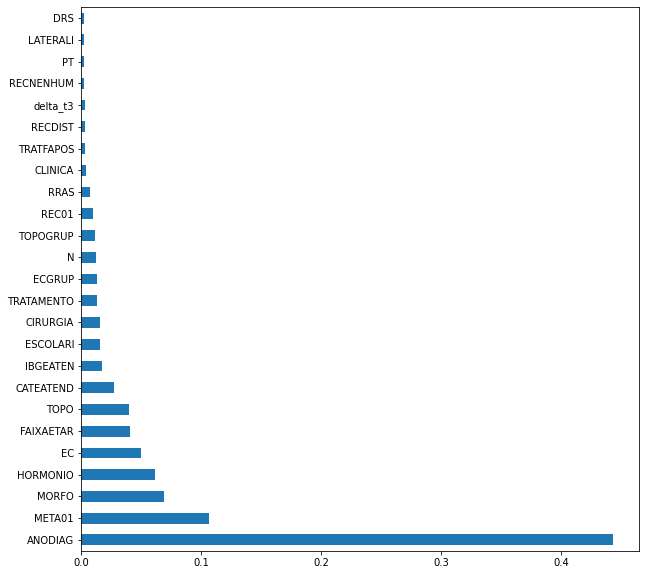

In [ ]:
plot_feat_importances(rfr_sp, X_testSP)

In [ ]:
#Fora
rfr_fora = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_fora.fit(X_trainFora_enc, y_trainFora)

df = validate_regression(X_testFora_, rfr_fora, y_testFora)
df.head()

Mean Absolute Error: 661.897
Mean Squared Error: 930451.127
Root Mean Squared Error: 964.599
Score: 0.463


,Atual,Predito
1077,722,590.680256
15361,900,1100.449912
3301,0,144.763233
32432,3242,2056.779114
39694,617,1534.478341


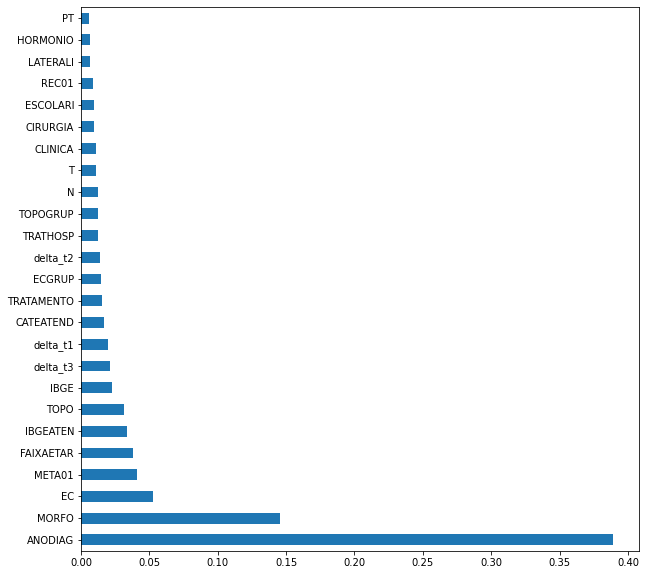

In [ ]:
plot_feat_importances(rfr_fora, X_testFora)

### **XGBoost Regressor**

In [ ]:
# SP
xgbr_sp = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_sp.fit(X_trainSP_enc, y_trainSP)

df = validate_regression(X_testSP_, xgbr_sp, y_testSP)
df.head()

Mean Absolute Error: 686.576
Mean Squared Error: 984998.882
Root Mean Squared Error: 992.471
Score: 0.515


,Atual,Predito
400744,1601,1213.645386
369215,821,581.393982
387264,607,2168.392090
296234,432,354.484192
712621,932,1454.262573


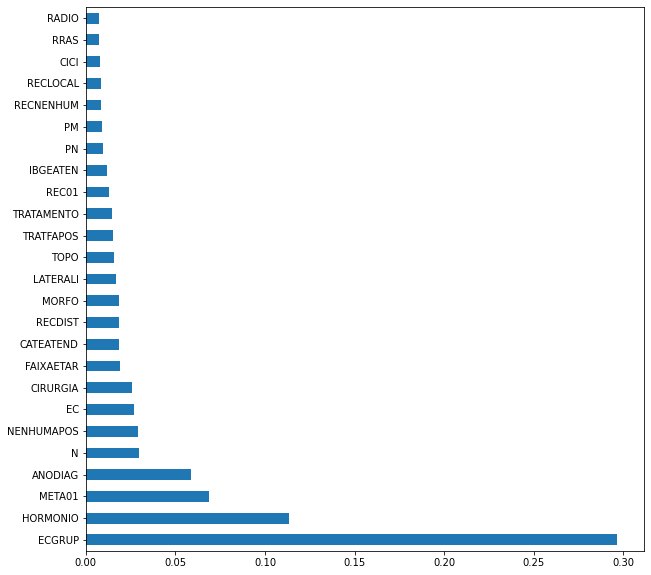

In [ ]:
plot_feat_importances(xgbr_sp, X_testSP)

In [ ]:
# Fora de SP
xgbr_fora = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_fora.fit(X_trainFora_enc, y_trainFora)

df = validate_regression(X_testFora_, xgbr_fora, y_testFora)
df.head()

Mean Absolute Error: 622.764
Mean Squared Error: 867916.256
Root Mean Squared Error: 931.620
Score: 0.499


,Atual,Predito
1077,722,329.546387
15361,900,559.976929
3301,0,93.525551
32432,3242,2317.746338
39694,617,1534.290405


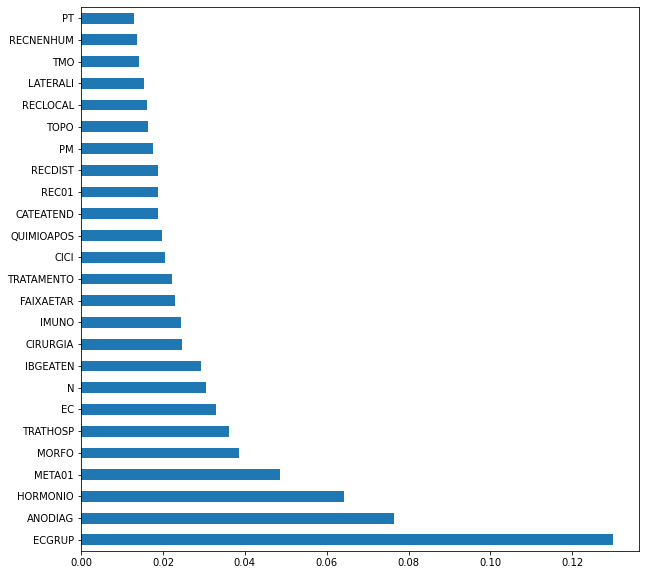

In [ ]:
plot_feat_importances(xgbr_fora, X_testFora)